## 確率ロボティクス　課題
このプログラムは，Q学習を用いて12×12マスの迷路を解くプログラムです．

* 注意点\
スタート・ゴールが壁に埋まらないような処理が入っていますが、迷路が自動生成のためスタートとゴールの間が壁で遮られる場合があります．
その場合は上手くいきそうな地図が出るまでやり直してください．

### インポートするモジュール
今回使用したモジュールは，迷路を表示するためのmatplotlib，数値計算を高速化するmath，numpy，jupyter上で動画を埋め込むためのIPython.displayで構成されています．また迷路の生成，学習の対象と行動の反映をするプログラムを別に用意しインポートしています．

In [1]:
import matplotlib
import math
import IPython.display
%matplotlib inline

import numpy as np
from map import Map
from agent import Agent

### Q学習　アルゴリズム
ここではQ学習を行っている部分について記述しています．

---------------
* インスタンス化　1-10行目\
ここではクラスをインスタンス化しています．
ここで学習を行う際のエピソード数，ステップ数，ステップサイズ，割引率，Qテーブルについて決定しています．\
参考としたプログラムと異なる点は行動価値関数の大きさです．\
自分の位置を見て学習していましたが，今回のコードでは周囲8マスの状態を見て学習を行うため，行動価値関数のサイズの変更を行う必要がありました．行動価値関数のサイズがなぜこの数字になったのかはAgentのコード部で説明します．

---------------
* 行動決定　12-21行目\
ここでは行動価値関数をもとに行動の決定を行っています．

---------------
* Qテーブルの更新　23-27行目\
ここでは公式に従ってQテーブルの更新をしています．

---------------
* 報酬　29-34行目\
ここでは報酬を決めています．\
参考としたプログラムと異なる点は，ゴールまでの距離を報酬として引いている点です．自分のプログラムでは実行するたびに地図の形が変わります．異なる地図を使用した場合でも共通して行動の指標となるものを検討した結果がこのゴールまでの距離でした．\
三平方の定理から求めたゴールまでの距離を報酬から引くことで，できるだけ早くゴールの方向へ向かう行動を期待しこの報酬としました．ゴールまでの距離の報酬との釣り合いのため、目的地についた際の報酬も参考プログラムとは異なる値になっています．

---------------
* 実行　37-58行目\
今までの変数をもとに学習をループさせています．\
38-42行目では，Agentを初期化し最初の行動を決定しています．\
44-56行目では，episodeをループさせています．

---------------

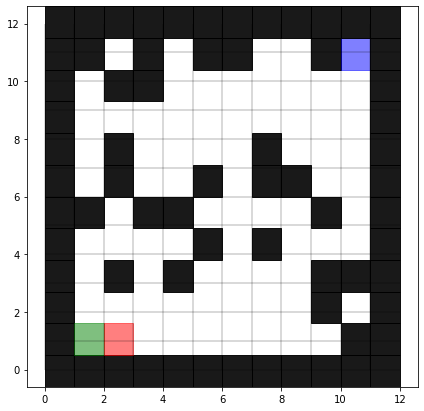

AttributeError: 'Map' object has no attribute 'ax'

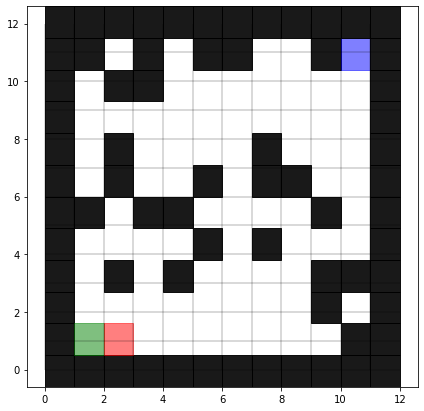

In [2]:
import matplotlib
import math
%matplotlib inline

import numpy as np
from map import Map
from agent import Agent

class q_learning(object):
    def __init__(self):
        self.map = Map()
        self.agent = Agent()
        self.max_episode = 50
        self.steps = 300
        self.gamma = 0.9
        self.alpha = 0.8
        self.q_table = np.random.uniform(low=-1,high=1,\
                                    size=(25856,self.agent.action_space))

    def decide_action(self,next_state,episode,q_table):
        first_probability = 0.75
        epsilon = first_probability * (1/(episode+1))
        if epsilon <= np.random.uniform(0,1):
            next_action = np.argmax(q_table[next_state])   
        else:
            prob = sum(q_table[next_state]+100) 
            w = (q_table[next_state]+100) / prob
            next_action = np.random.choice(range(4) ,p=w)  
        return next_action

    def update_Qtable(self,q_table,state,action,reward,next_state):
        next_max_q = max(q_table[next_state])
        q_table[state,action] = (1 - self.alpha) * q_table[state,action]+\
                                self.alpha * (reward + self.gamma * next_max_q)
        return q_table

    def reward(self,done,state,next_state):
        if done:
            reward = 300
        else:
            reward  = -(math.sqrt((self.map.goal_pos[0]-self.agent.pos[0])**2)+\
                        math.sqrt((self.map.goal_pos[1]-self.agent.pos[1])**2))*0.5    
        return reward


    def run(self):
        for episode in range(self.max_episode):
            self.agent = Agent(self.map.init_pos)
            state = self.agent.get_state(self.map.map)
            action = np.argmax(self.q_table[state]) 
            reward_of_episode = 0

            for i in range(self.steps):
                direction = self.map.chack_movable(self.agent.pos) 
                self.agent.action(action,direction)
                done = self.agent.check_done()
                next_state = self.agent.get_state(self.map.map)
                reward = self.reward(done,state,next_state) 
                reward_of_episode += reward
                self.q_table = self.update_Qtable(self.q_table,state,action,reward,next_state)
                action = self.decide_action(next_state,episode,self.q_table)
                state = next_state
                self.map.plot(self.agent.pos,self.q_table)
                if done:
                    break
            print("episode %5d, reward %6d, step %5d" %(episode+1,reward_of_episode,i+1))

if __name__ == "__main__":
   q_learning().run()

### 学習の過程
学習に5分ほど時間がかかるため，実行したときの様子を倍速で再生したものを用意しました．

In [ ]:
IPython.display.YouTubeVideo('JOuJ6T_w22A', width=480, height=270)